In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df_c1_t = pd.read_csv('07-08-2024_12-43-55_Coil_table_data.csv', parse_dates = True, index_col=0)  # coil #1 table data
df_c1_s = pd.read_csv('07-08-2024_14-09-02_Mangnetometer_sensor_data.csv', parse_dates = True, date_format="%d-%m-%Y_%H-%M-%S", index_col=0 )  # coil #1 sensor data

# converting index to datetime index
df_c1_t.index = pd.to_datetime(df_c1_t.index, format="%d-%m-%Y_%H-%M-%S")
df_c1_s.index = pd.to_datetime(df_c1_s.index)

# removing redundunt columns
df_c1_t.drop(columns=['EEpose_0',	'EEpose_1',	'EEpose_2',	'EEpose_3',	'EEpose_4',	'EEpose_5',	'EEpose_6',	'EEpose_7',	'EEpose_8',	'EEpose_9',	'EEpose_10', 'EEpose_11', 'EEpose_12',	'EEpose_13', 'EEpose_14', 'EEpose_15', 'Unnamed: 89'], inplace=True)

# resampling the data for 1sec freq
df_c1_t = df_c1_t.resample('s').mean()
df_c1_s = df_c1_s.resample('s').mean()

df_c1_t = df_c1_t.dropna()

# join the sensor and table dataframes
df1 = df_c1_t.join(df_c1_s, how="inner")  # intersecion of the two dataframes


C:\Users\Gediy\AppData\Local\Temp\ipykernel_23872\200936331.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_c1_t = pd.read_csv('07-08-2024_12-43-55_Coil_table_data.csv', parse_dates = True, index_col=0)  # coil #1 table data


In [3]:
# divide the data into single sweeps across the 3D space
df1_dic = {}
for i in range(-15,17,2):
    mask = df1['cmdCoilCurrent_1(A)'] == i
    df1_dic[i] = df1[mask]
    
    
# cleaning data
df1_dic[-15] =  df1_dic[-15].drop(df1_dic[-15].index[-2])

df1_dic[-13] =  df1_dic[-13].iloc[4:]
df1_dic[-13] =  df1_dic[-13].drop(df1_dic[-13].index[-2])

df1_dic[-11] =  df1_dic[-11].iloc[3:]
df1_dic[-11] =  df1_dic[-11].drop(df1_dic[-11].index[-2])

df1_dic[-9] =  df1_dic[-9].iloc[5:]
df1_dic[-9] =  df1_dic[-9].drop(df1_dic[-9].index[-2])

df1_dic[-7] =  df1_dic[-7].iloc[4:]
df1_dic[-7] =  df1_dic[-7].drop(df1_dic[-7].index[-2])

df1_dic[-5] =  df1_dic[-5].iloc[3:]
df1_dic[-5] =  df1_dic[-5].drop(df1_dic[-5].index[-2])

df1_dic[-3] =  df1_dic[-3].iloc[3:]
df1_dic[-3] =  df1_dic[-3].drop(df1_dic[-3].index[-2])

df1_dic[-1] =  df1_dic[-1].iloc[2:]
df1_dic[-1] =  df1_dic[-1].drop(df1_dic[-1].index[-2])

df1_dic[1] =  df1_dic[1].iloc[2:]
df1_dic[1] =  df1_dic[1].drop(df1_dic[1].index[-2])

df1_dic[3] =  df1_dic[3].iloc[12:-4]
df1_dic[3] =  df1_dic[3].drop(df1_dic[3].index[-2])

df1_dic[5] =  df1_dic[5].iloc[:-7]
df1_dic[5] =  df1_dic[5].drop(df1_dic[5].index[-2])

df1_dic[7] =  df1_dic[7].iloc[:-7]
df1_dic[7] =  df1_dic[7].drop(df1_dic[7].index[-2])

df1_dic[9] =  df1_dic[9].iloc[:-6]
df1_dic[9] =  df1_dic[9].drop(df1_dic[9].index[-2])

df1_dic[11] =  df1_dic[11].iloc[:-6]
df1_dic[11] =  df1_dic[11].drop(df1_dic[11].index[-2])

df1_dic[13] =  df1_dic[13].iloc[:-6]
df1_dic[13] =  df1_dic[13].drop(df1_dic[13].index[-2])

df1_dic[15] =  df1_dic[15].iloc[:-8]
df1_dic[15] =  df1_dic[15].drop(df1_dic[15].index[-2])

for i in range(-15,17,2):
    
    # Calculate the time delta between consecutive rows
    df1_dic[i]['delta'] = df1_dic[i].index.to_series().diff()
    
    # Create a mask for rows where the time delta is greater than 1 second
    mask = df1_dic[i]['delta'] > pd.Timedelta(seconds=1)

    # Include both the identified rows and 3 rows preceding them
    rows_to_keep = df1_dic[i].index[mask].to_series().index - pd.Timedelta(seconds=3)
    
    df1_dic[i] = df1_dic[i].loc[rows_to_keep]

In [4]:
df1_dic[-9][['cmdCoilCurrent_1(A)','Sensor_1_dir_x','Sensor_1_dir_y','Sensor_1_dir_z']]


,cmdCoilCurrent_1(A),Sensor_1_dir_x,Sensor_1_dir_y,Sensor_1_dir_z
TimeStamp,,,,
2024-08-07 12:58:47,-9.0,0.219789,0.220460,0.040795
2024-08-07 12:58:51,-9.0,0.060192,0.219940,0.040090
2024-08-07 12:58:55,-9.0,-0.099821,0.220220,0.039844
2024-08-07 12:58:59,-9.0,-0.100110,0.059988,0.039819
2024-08-07 12:59:03,-9.0,0.059793,0.060002,0.039968
...,...,...,...,...
2024-08-07 13:02:39,-9.0,0.059910,0.059862,0.280158
2024-08-07 13:02:43,-9.0,0.219899,0.060006,0.279879
2024-08-07 13:02:47,-9.0,0.219466,-0.095104,0.274659


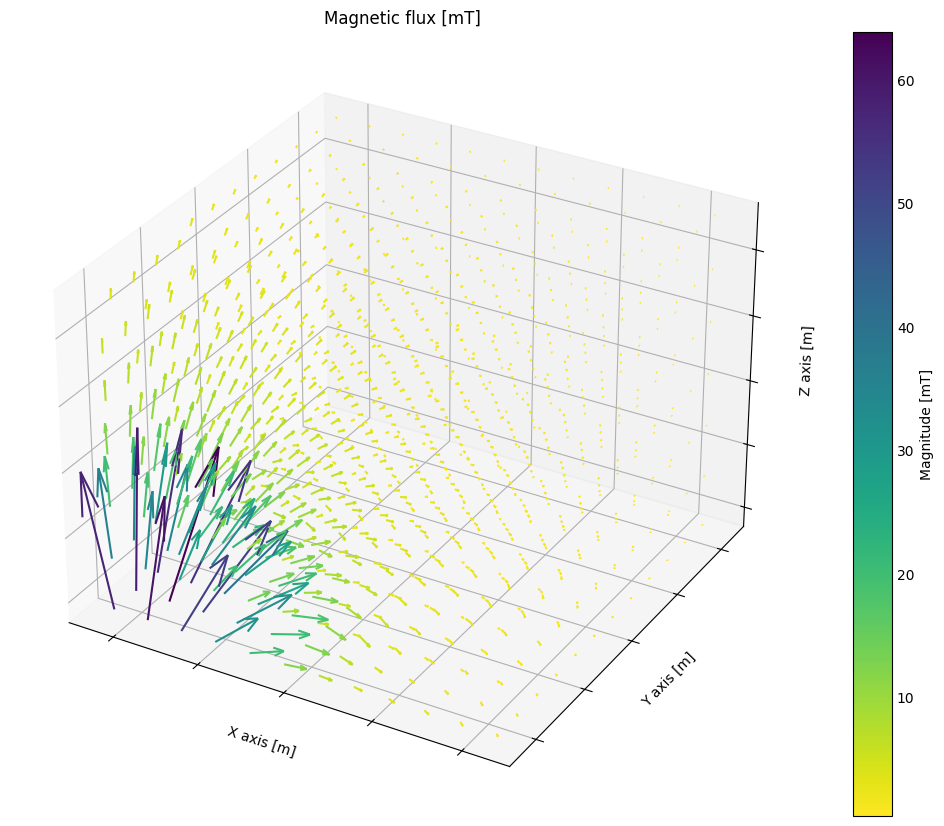

In [5]:
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('_mpl-gallery')

# Make data
n = 4
x = df1_dic[13][['Sensor_1_dir_x','Sensor_2_dir_x','Sensor_3_dir_x','Sensor_4_dir_x',
                'Sensor_5_dir_x','Sensor_6_dir_x','Sensor_7_dir_x','Sensor_8_dir_x',
                'Sensor_9_dir_x','Sensor_10_dir_x','Sensor_11_dir_x','Sensor_12_dir_x',
                'Sensor_13_dir_x','Sensor_14_dir_x','Sensor_15_dir_x','Sensor_16_dir_x']].values.reshape(-1, 1)
y = df1_dic[13][['Sensor_1_dir_y','Sensor_2_dir_y','Sensor_3_dir_y','Sensor_4_dir_y',
                'Sensor_5_dir_y','Sensor_6_dir_y','Sensor_7_dir_y','Sensor_8_dir_y',
                'Sensor_9_dir_y','Sensor_10_dir_y','Sensor_11_dir_y','Sensor_12_dir_y',
                'Sensor_13_dir_y','Sensor_14_dir_y','Sensor_15_dir_y','Sensor_16_dir_y']].values.reshape(-1, 1)
z = df1_dic[13][['Sensor_1_dir_z','Sensor_2_dir_z','Sensor_3_dir_z','Sensor_4_dir_z',
                'Sensor_5_dir_z','Sensor_6_dir_z','Sensor_7_dir_z','Sensor_8_dir_z',
                'Sensor_9_dir_z','Sensor_10_dir_z','Sensor_11_dir_z','Sensor_12_dir_z',
                'Sensor_13_dir_z','Sensor_14_dir_z','Sensor_15_dir_z','Sensor_16_dir_z']].values.reshape(-1, 1)

# X, Y, Z = np.meshgrid(x, y, z)

U = df1_dic[13][['sensor_1_X [mT]','sensor_2_X [mT]','sensor_3_X [mT]','sensor_4_X [mT]',
                'sensor_5_X [mT]','sensor_6_X [mT]','sensor_7_X [mT]','sensor_8_X [mT]',
                'sensor_9_X [mT]','sensor_10_X [mT]','sensor_11_X [mT]','sensor_12_X [mT]',
                'sensor_13_X [mT]','sensor_14_X [mT]','sensor_15_X [mT]','sensor_16_X [mT]',]].values.reshape(-1, 1)

V = df1_dic[13][['sensor_1_Y [mT]','sensor_2_Y [mT]','sensor_3_Y [mT]','sensor_4_Y [mT]',
                'sensor_5_Y [mT]','sensor_6_Y [mT]','sensor_7_Y [mT]','sensor_8_Y [mT]',
                'sensor_9_Y [mT]','sensor_10_Y [mT]','sensor_11_Y [mT]','sensor_12_Y [mT]',
                'sensor_13_Y [mT]','sensor_14_Y [mT]','sensor_15_Y [mT]','sensor_16_Y [mT]',]].values.reshape(-1, 1)


W = df1_dic[13][['sensor_1_Z [mT]','sensor_2_Z [mT]','sensor_3_Z [mT]','sensor_4_Z [mT]',
                'sensor_5_Z [mT]','sensor_6_Z [mT]','sensor_7_Z [mT]','sensor_8_Z [mT]',
                'sensor_9_Z [mT]','sensor_10_Z [mT]','sensor_11_Z [mT]','sensor_12_Z [mT]',
                'sensor_13_Z [mT]','sensor_14_Z [mT]','sensor_15_Z [mT]','sensor_16_Z [mT]',]].values.reshape(-1, 1)

# Compute the magnitude of the vectors
magnitude = np.sqrt(U**2 + V**2 + W**2)

# Normalize the magnitudes to the range [0, 1]
norm = Normalize(vmin=magnitude.min(), vmax=magnitude.max())

# Create a colormap object
colormap = cm.viridis_r  # You can choose other colormaps like 'plasma', 'inferno', etc.


# Plot
# Create a figure with custom size
fig = plt.figure(figsize=(12, 8))  # Set figure size
ax = fig.add_subplot(111, projection='3d')

plot = ax.quiver(x, y, z, U, V, W, length=0.002, normalize= False, color=colormap(norm(magnitude)))

# Add a colorbar to show the mapping of magnitudes to colors
mappable = cm.ScalarMappable(norm=norm, cmap=colormap)
cbar = plt.colorbar(mappable, ax=ax)
cbar.set_label('Magnitude [mT]')

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[],
       xlabel = ('X axis [m]'),
       ylabel = ('Y axis [m]'),
       zlabel = ('Z axis [m]'),
       title = ('Magnetic flux [mT]'))

plt.show()

In [6]:
#save data
# Create an empty DataFrame
concatenated_df1 = pd.DataFrame()

for i in range(-15,17,2):
    # Concatenate DataFrames along rows (default axis=0)
    concatenated_df1 = pd.concat([concatenated_df1, df1_dic[i]], axis=0)
    
# Save the concatenated DataFrame to a CSV file
concatenated_df1.to_csv('Processed_data/coil1_data.csv', index=True)  # index=True to include datetime index